# **Medical training platform project’s data analysis**

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
# Exploring the dataset
df = pd.read_csv('medical_conditions_dataset.csv')  # Cambia 'data.csv' por el nombre de tu archivo si es diferente

# show the first few rows and info about the dataset
display(df.head())
df.info()

,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,1,User0001,NaN,male,Non-Smoker,NaN,NaN,NaN,Pneumonia
1,2,User0002,30.0,male,Non-Smoker,NaN,105.315064,NaN,Diabetic
2,3,User0003,18.0,male,Non-Smoker,35.612486,NaN,NaN,Pneumonia
3,4,User0004,NaN,male,Non-Smoker,NaN,99.119829,NaN,Pneumonia
4,5,User0005,76.0,male,Non-Smoker,NaN,NaN,NaN,Diabetic


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   full_name       10000 non-null  object 
 2   age             5445 non-null   float64
 3   gender          10000 non-null  object 
 4   smoking_status  10000 non-null  object 
 5   bmi             4652 non-null   float64
 6   blood_pressure  3766 non-null   float64
 7   glucose_levels  4756 non-null   float64
 8   condition       10000 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 703.3+ KB


## *Distribution medical Conditions*

Distribution of medical conditions (%):
condition
Diabetic     60.13
Pneumonia    25.27
Cancer       14.60
Name: proportion, dtype: float64


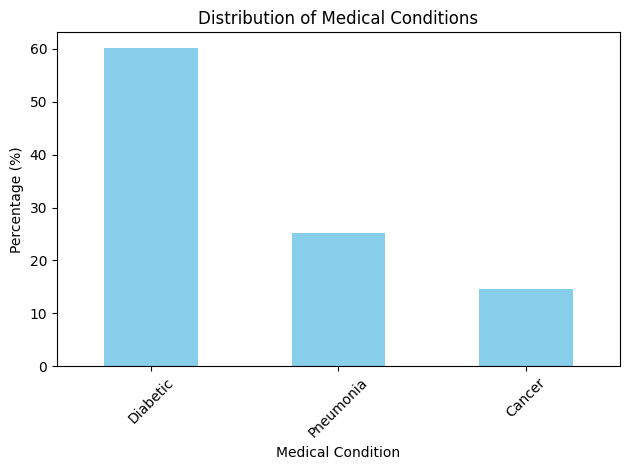

In [5]:
# Distribution of medical conditions
condition_counts = df['condition'].value_counts(normalize=True) * 100
print("Distribution of medical conditions (%):")
print(condition_counts)

# Plotting the distribution
condition_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## *Relation Age vs Condition*

In [32]:
# Handle nulls (example: fill with mean per condition)
df['age'] = df.groupby('condition')['age'].transform(lambda x: x.fillna(x.mean()))

# One-hot encode conditions
df_encoded = pd.get_dummies(df, columns=['condition'], drop_first=False)

# Define custom bins and labels
bins = [0, 18, 35, 50, 65, df['age'].max()]
labels = ['0-18', '19-35', '36-50', '51-65', '66+']

# Create age_group column
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True, include_lowest=True)


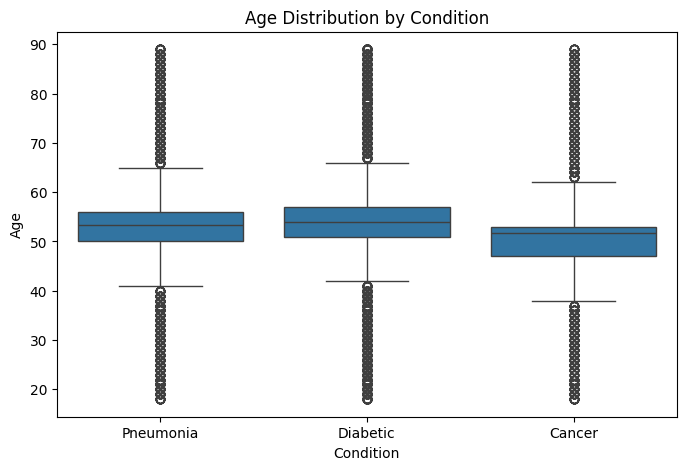

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(x='condition', y='age', data=df)
plt.title("Age Distribution by Condition")
plt.xlabel("Condition")
plt.ylabel("Age")
plt.show()

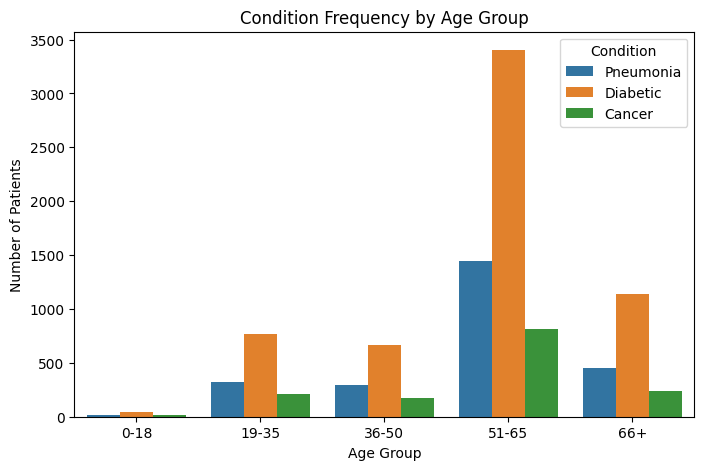

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(x='age_group', hue='condition', data=df)
plt.title("Condition Frequency by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.legend(title="Condition")
plt.show()

## *Blood Pressure vs Glucoce Levels*

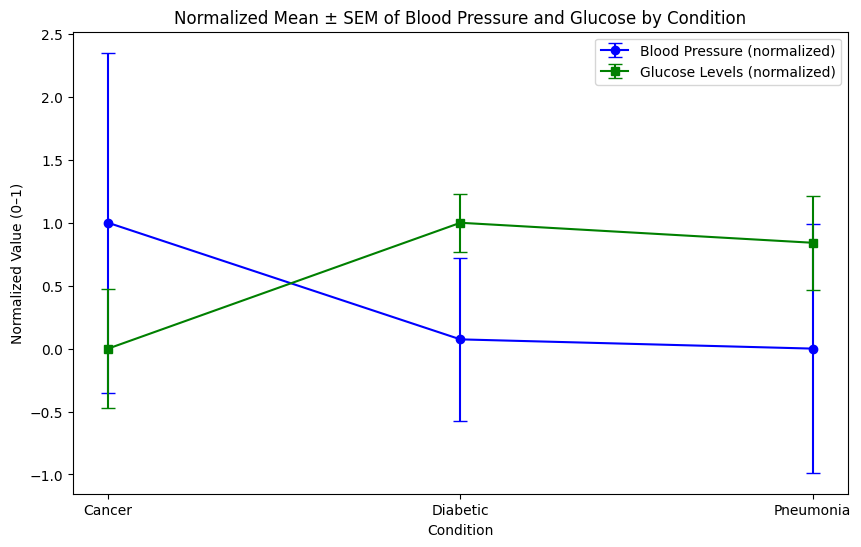

In [41]:


# 1. Group by condition and calculate mean & SEM (standard error of the mean)
summary = df.groupby('condition')[['blood_pressure', 'glucose_levels']].agg(['mean', 'sem'])

# 2. Normalize mean and SEM to 0–1 scale for comparability
for col in ['blood_pressure', 'glucose_levels']:
    # Normalize means
    min_val = summary[col]['mean'].min()
    max_val = summary[col]['mean'].max()
    summary[col, 'mean_norm'] = (summary[col]['mean'] - min_val) / (max_val - min_val)

    # Normalize SEM with the same scale
    summary[col, 'sem_norm'] = summary[col]['sem'] / (max_val - min_val)

# 3. Plot normalized values with SEM error bars
plt.figure(figsize=(10,6))

# Blood Pressure
plt.errorbar(
    summary.index,
    summary['blood_pressure']['mean_norm'],
    yerr=summary['blood_pressure']['sem_norm'],
    fmt='-o',
    capsize=5,
    label='Blood Pressure (normalized)',
    color='blue'
)

# Glucose Levels
plt.errorbar(
    summary.index,
    summary['glucose_levels']['mean_norm'],
    yerr=summary['glucose_levels']['sem_norm'],
    fmt='-s',
    capsize=5,
    label='Glucose Levels (normalized)',
    color='green'
)

# Labels and title
plt.title("Normalized Mean ± SEM of Blood Pressure and Glucose by Condition")
plt.xlabel("Condition")
plt.ylabel("Normalized Value (0–1)")
plt.legend()
plt.show()
